### Import packages and required name dataset

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction import DictVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
#creating a pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

#read data frame
df = pd.read_csv('gender_dataset.csv')

#check the types
print(f"df.size is {np.round(df.size/1024**2,2)} MB")
print(f"df.dtypes are {df.dtypes}")


df.size is 0.18 MB
df.dtypes are name      object
gender    object
dtype: object


### Data quality checks

In [183]:
#check for null values
df.isna().sum()
#df.isnull()

name      0
gender    0
dtype: int64

### Plot of gender distribution

63.8%
(60600)
36.2%
(34425)


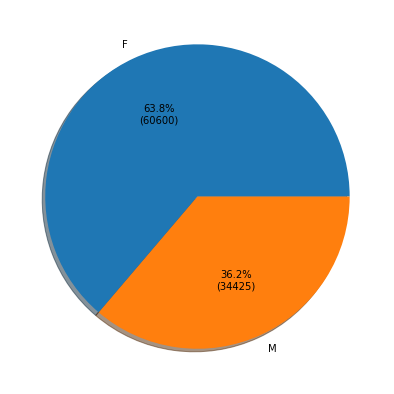

In [185]:
 
# Creating plot
df_final_names= df.copy(deep=True)
#df_final_names['sex'].replace({'F':0,'M':1},inplace=True)

fig = plt.figure(figsize =(10, 7))
plot_df = df_final_names.groupby(['gender']).count().reset_index()
total = plot_df['name'].sum()


def my_fmt(x):
    print("{:.1f}%\n({:.0f})".format(x, total*x/100))
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)
   

plt.pie(plot_df.name, labels = plot_df.gender,autopct=my_fmt, shadow=True)
 
# show plot (0 is female and 1 is male)
plt.show()



### Create a train and test sample

In [186]:

#x =feature  and y=target
X = df_final_names['name'].astype(str)
Y = df_final_names['gender'].astype(str)

cv = CountVectorizer()
df_final_names.gender.replace({'F':0,'M':1},inplace=True)
#Xfeatures =df_final_names['name']
#X_raw = cv.fit_transform(Xfeatures)
Y = df_final_names.gender

#X_train, X_test, y_train, y_test = train_test_split(X_raw, Y,test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)



### Create a pipeline

In [187]:

#Naive Bayes algorithm is only used for textual data classification and cannot be used to predict numeric values.
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1)))
                   , ('tfidf', TfidfTransformer(norm='l2',sublinear_tf=True ,use_idf=False))
                   , ('clf', MultinomialNB(alpha=0.1))])

#model training

#clf = MultinomialNB()
#text_clf = clf.fit(X_train,y_train)
#clf.score(X_test,y_test)
text_clf = text_clf.fit(X_train, y_train)



### Test accuracy 

In [188]:

from sklearn.metrics import accuracy_score
predicted = text_clf.predict(X_test)
#print(predicted)
accuracy_score(y_test, predicted)



0.6419889502762431

### Confusion matrix

In [189]:

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, predicted)
print(classification_report(y_test, predicted) )



              precision    recall  f1-score   support

           0       0.64      1.00      0.78     12201
           1       0.00      0.00      0.00      6804

    accuracy                           0.64     19005
   macro avg       0.32      0.50      0.39     19005
weighted avg       0.41      0.64      0.50     19005



C:\Users\MrOffice\Documents\Work\Training\StreamlitDocker\streamlit_app\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MrOffice\Documents\Work\Training\StreamlitDocker\streamlit_app\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MrOffice\Documents\Work\Training\StreamlitDocker\streamlit_app\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [190]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
#plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
#plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
#plt.xlabel('False Positive Rate or (1 - Specifity)')
#plt.ylabel('True Positive Rate or (Sensitivity)')
#plt.title('Receiver Operating Characteristic')
#plt.legend(loc="lower right")

### Save model 

In [191]:
import joblib
joblib.dump(text_clf, "Model/Predict_Gender.pkl")


['Model/Predict_Gender.pkl']

### Predict using model 

In [192]:
model=joblib.load('model/Predict_Gender.pkl')

print('Enter name :')
name=input()
print(name)


print(f"Predicted gender = {model.predict((name,))[0]}")




Enter name :
Jane
Predicted gender = 0
